In [1]:
# Initialize OK
from client.api.notebook import Notebook
ok = Notebook('proj2b.ok')

Assignment: proj2b
OK, version v1.13.11



# Project 2 Part B: Spam/Ham Classification
## Classifiers
### The assignment is due on Monday, April 27th at 11:59pm PST.

**Collaboration Policy**

Data science is a collaborative activity. While you may talk with others about
the project, we ask that you **write your solutions individually**. If you do
discuss the assignments with others please **include their names** at the top
of your notebook.

**Collaborators**: *list collaborators here*

## This Assignment
In Project 2 Part A, you made an effort to understand the data through EDA, and did some basic feature engineering. You also built a Logistic Regression model to classify Spam/Ham emails. In Part B, you will learn how to evaluate the classifiers you built. You will also have the chance to improve your model by selecting more features.

## Warning
We've tried our best to filter the data for anything blatantly offensive as best as we can, but unfortunately there may still be some examples you may find in poor taste. If you encounter these examples and believe it is inappropriate for students, please let a TA know and we will try to remove it for future semesters. Thanks for your understanding!

## Score Breakdown
Question | Points
--- | ---
6a | 1
6b | 1
6c | 2
6d | 2
6e | 1
6f | 3
7 | 6
8 | 6
9 | 15
Total | 37

## Setup

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style = "whitegrid", 
        color_codes = True,
        font_scale = 1.5)

In [3]:
from utils import fetch_and_cache_gdrive
fetch_and_cache_gdrive('1SCASpLZFKCp2zek-toR3xeKX3DZnBSyp', 'train.csv')
fetch_and_cache_gdrive('1ZDFo9OTF96B5GP2Nzn8P8-AL7CTQXmC0', 'test.csv')

original_training_data = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

# Convert the emails to lower case as a first step to processing the text
original_training_data['email'] = original_training_data['email'].str.lower()
test['email'] = test['email'].str.lower()

original_training_data.head()

from sklearn.model_selection import train_test_split

train, val = train_test_split(original_training_data, test_size=0.1, random_state=42)

Using version already downloaded: Sat Apr 25 20:40:32 2020
MD5 hash of file: 0380c4cf72746622947b9ca5db9b8be8
Using version already downloaded: Sat Apr 25 20:40:33 2020
MD5 hash of file: a2e7abd8c7d9abf6e6fafc1d1f9ee6bf


The following code is adapted from Part A of this project. You will be using it again in Part B.

In [4]:
def words_in_texts(words, texts):
    '''
    Args:
        words (list-like): words to find
        texts (Series): strings to search in
    
    Returns:
        NumPy array of 0s and 1s with shape (n, p) where n is the
        number of texts and p is the number of words.
    '''
    indicator_array = 1 * np.array([texts.str.contains(word) for word in words]).T
    return indicator_array

some_words = ['drug', 'bank', 'prescription', 'memo', 'private']

X_train = words_in_texts(some_words, train['email']) 
Y_train = np.array(train['spam'])

X_train[:5], Y_train[:5]

(array([[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0]]), array([0, 0, 0, 0, 0]))

Recall that you trained the following model in Part A.

In [5]:
from sklearn.linear_model import LogisticRegression

model =  LogisticRegression()
model.fit(X_train, Y_train)

training_accuracy = model.score(X_train, Y_train)
print("Training Accuracy: ", training_accuracy)

Training Accuracy:  0.7576201251164648


## Evaluating Classifiers

The model you trained doesn't seem too shabby! But the classifier you made above isn't as good as this might lead us to believe. First, we are evaluating accuracy on the training set, which may provide a misleading accuracy measure, especially if we used the training set to identify discriminative features. In future parts of this analysis, it will be safer to hold out some of our data for model validation and comparison.

Presumably, our classifier will be used for **filtering**, i.e. preventing messages labeled `spam` from reaching someone's inbox. There are two kinds of errors we can make:
- False positive (FP): a ham email gets flagged as spam and filtered out of the inbox.
- False negative (FN): a spam email gets mislabeled as ham and ends up in the inbox.

These definitions depend both on the true labels and the predicted labels. False positives and false negatives may be of differing importance, leading us to consider more ways of evaluating a classifier, in addition to overall accuracy:

**Precision** measures the proportion $\frac{\text{TP}}{\text{TP} + \text{FP}}$ of emails flagged as spam that are actually spam.

**Recall** measures the proportion $\frac{\text{TP}}{\text{TP} + \text{FN}}$ of spam emails that were correctly flagged as spam. 

**False-alarm rate** measures the proportion $\frac{\text{FP}}{\text{FP} + \text{TN}}$ of ham emails that were incorrectly flagged as spam. 

The following image might help:

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/700px-Precisionrecall.svg.png" width="500px">

Note that a true positive (TP) is a spam email that is classified as spam, and a true negative (TN) is a ham email that is classified as ham.

In [6]:
len(Y_train)

7513

### Question 6a

Suppose we have a classifier `zero_predictor` that always predicts 0 (never predicts positive). How many false positives and false negatives would this classifier have if it were evaluated on the training set and its results were compared to `Y_train`? Fill in the variables below (answers can be hard-coded):

*Tests in Question 6 only check that you have assigned appropriate types of values to each response variable, but do not check that your answers are correct.*

<!--
BEGIN QUESTION
name: q6a
points: 1
-->

In [7]:
zero_predictor_fp = 0
zero_predictor_fn = sum(Y_train)
zero_predictor_fn 

1918

In [8]:
ok.grade("q6a");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



### Question 6b

What are the accuracy and recall of `zero_predictor` (classifies every email as ham) on the training set? Do **NOT** use any `sklearn` functions.

<!--
BEGIN QUESTION
name: q6b
points: 1
-->

In [9]:
zero_predictor_acc = 1 - (np.sum(Y_train)/ len(Y_train))
zero_predictor_recall = 0

In [10]:
ok.grade("q6b");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



### Question 6c

Provide brief explanations of the results from 6a and 6b. Explain why the number of false positives, number of false negatives, accuracy, and recall all turned out the way they did.

<!--
BEGIN QUESTION
name: q6c
manual: True
points: 2
-->
<!-- EXPORT TO PDF -->

I put false positive as 0 becausue false positive means ham (0) being flagged as spam (1). This is impossible since everything will be guessed as ham by the zero predictor. As for false negative, meaning spam (1) being flagged as ham (0), since it is a zero predictor we know that all the spam will be flagged as ham. Therefore the number of false negatives is equal to the number of spams since all will be falsely predicted as ham. 

As for both accuracy (precision) and recall, since both equations involved dividing the True Positives by a sum (TP + FP or TP + FN), and since True positives are equal to 0 since all predictions are equal to zero, then both accuracy and recall must be equal to zero. 

In [11]:
Y_train_hat = model.predict(X_train)
Y_train_hat

array([0, 0, 0, ..., 0, 0, 0])

### Question 6d

Compute the precision, recall, and false-alarm rate of the `LogisticRegression` classifier created and trained in Part A. Do **NOT** use any `sklearn` functions.

**Note: In lecture we used the `sklearn` package to compute the rates. Here you should work through them using just the definitions to help build a deeper understanding.**

<!--
BEGIN QUESTION
name: q6d
points: 2
-->

In [12]:
Y_train_hat = model.predict(X_train)
logistic_predictor_precision = np.sum((Y_train_hat == 1) & (Y_train == 1)) / np.sum(Y_train_hat)
logistic_predictor_recall = np.sum((Y_train_hat == 1) & (Y_train == 1)) / np.sum(Y_train)
logistic_predictor_far = np.sum((Y_train_hat == 1) & (Y_train == 0)) / (len(Y_train) - np.sum(Y_train))

In [13]:
ok.grade("q6d");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 3
    Failed: 0
[ooooooooook] 100.0% passed



In [32]:
print(logistic_predictor_precision)
print(logistic_predictor_far)

0.6422287390029325
0.021805183199285077


### Question 6e

Are there more false positives or false negatives when using the logistic regression classifier from Part A?

<!--
BEGIN QUESTION
name: q6e
manual: True
points: 1
-->
<!-- EXPORT TO PDF -->

There are more False Negatives when using the logistic regression classifier from Part A

In [15]:
1 - (np.sum(Y_train)/ len(Y_train))

0.7447091707706641

### Question 6f

1. Our logistic regression classifier got 75.8% prediction accuracy (number of correct predictions / total). How does this compare with predicting 0 for every email?
1. Given the word features we gave you above, name one reason this classifier is performing poorly. Hint: Think about how prevalent these words are in the email set.
1. Which of these two classifiers would you prefer for a spam filter and why? Describe your reasoning and relate it to at least one of the evaluation metrics you have computed so far.

<!--
BEGIN QUESTION
name: q6f
manual: True
points: 3
-->
<!-- EXPORT TO PDF -->

1. Our logistic regression classifier in this case is slightly higher than our prediction accuracy where we predict 0 very every email which has a 74.4% accuracy.
2. One reason why the classifier might be doing poorly is because of word choice. Words such as bank and private are very common words in both spam and ham emails. As a result, the proportion difference between the words isn't great enough to make a good classifier.
3. Even though the accuracy in the logistic regresion model is slightly better I would prefer the zero predictor model. This is because the zero predictor model will never predict ham as spam, since it will never predict a false positive. The logistic regression however can predict false positives. As a ressult, I would rather have all emails labelled as ham so that I don't lose anything important rather than a logistic regression model that can make both false negative and false positive mistakes. 

## Moving Forward

With this in mind, it is now your task to make the spam filter more accurate. In order to get full credit on the accuracy part of this assignment, you must get at least **88%** accuracy on the test set. To see your accuracy on the test set, you will use your classifier to predict every email in the `test` DataFrame and upload your predictions to Kaggle.

**Kaggle limits you to four submissions per day**. This means you should start early so you have time if needed to refine your model. You will be able to see your accuracy on the entire set when submitting to Kaggle (the accuracy that will determine your score for question 9).

Here are some ideas for improving your model:

1. Finding better features based on the email text. Some example features are:
    1. Number of characters in the subject / body
    1. Number of words in the subject / body
    1. Use of punctuation (e.g., how many '!' were there?)
    1. Number / percentage of capital letters 
    1. Whether the email is a reply to an earlier email or a forwarded email
1. Finding better (and/or more) words to use as features. Which words are the best at distinguishing emails? This requires digging into the email text itself. 
1. Better data processing. For example, many emails contain HTML as well as text. You can consider extracting out the text from the HTML to help you find better words. Or, you can match HTML tags themselves, or even some combination of the two.
1. Model selection. You can adjust parameters of your model (e.g. the regularization parameter) to achieve higher accuracy. Recall that you should use cross-validation to do feature and model selection properly! Otherwise, you will likely overfit to your training data.

You may use whatever method you prefer in order to create features, but **you are not allowed to import any external feature extraction libraries**. In addition, **you are only allowed to train logistic regression models**. No random forests, k-nearest-neighbors, neural nets, etc.

We have not provided any code to do this, so feel free to create as many cells as you need in order to tackle this task. However, answering questions 7, 8, and 9 should help guide you.

---

**Note:** *You should use the **validation data** to evaluate your model and get a better sense of how it will perform on the Kaggle evaluation.*

---

# Note to Self: Everything Below Here is me testing out stuff

### Length of Spam vs Ham (certain words and lengths, and how many spaces there were, symbols like !@#%^&)
Things to include
* word selection ['size', 'opportunity', 'guarantee', "border", "align", "font size", "base64", "center", "body", "table width", "head", 'body', 'font', 'mortgage', 'insurance', 'best']
* email length characters
* email length by number of words, not characters
* Number of times we see word [@, $, []]

In [16]:
first_ham = original_training_data[original_training_data['spam'] == 0].iloc[2]['email']
first_spam = original_training_data[original_training_data['spam'] == 1].iloc[2]['email']
print(first_ham)
print(first_spam)

depends on how much over spending vs. how much (and what type) over
 regulation.
 
 the biggest problem with over regulation is the costs can be invisible.
 it also has the ability to single out particular people, while over
 spending spreads the damage more evenly.  rent control would be an
 example of a regulation solution that is in general worse than spending
 tons of money on public housing.
 
 as for the definition of a liberal being someone who seeks to impose
 both, i find no fault in that definition whatsoever.  the opinion that
 either we are spending too much or we have too much regulation is pretty
 much anathema to liberal politics.
 
 finally, those who argue that there are private replacements for much
 government regulation are not saying that a state of nature (no private
 replacements, no government regulation) is better than government
 regulation itself.
 
 and in my experience people who label themselves 'green' (which does not
 include everyone who loves trees and

/srv/conda/envs/data100/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/srv/conda/envs/data100/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0.5, 0, 'Length of Subject Line')

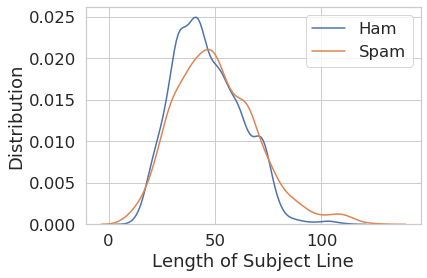

In [17]:
# Testing to see if email subject line length is helpful
temp = original_training_data.copy()
lengths = temp[['subject']]
lengths['count'] = train['subject'].str.len()
spam_ham = train['spam']
spam_ham = spam_ham.replace(0, 'ham')
spam_ham = spam_ham.replace(1, 'spam')
lengths['spam'] = spam_ham
lengths = lengths.drop(columns = {'subject'})
hams_length = lengths[lengths['spam'] == 'ham'].drop(columns = {'spam'})
spam_length = lengths[lengths['spam'] == 'spam'].drop(columns = {'spam'})
ax = sns.distplot(hams_length, hist = False, label = 'Ham')
ax = sns.distplot(spam_length, hist = False, label = 'Spam')
ax.set_ylabel('Distribution')
ax.set_xlabel('Length of Subject Line')

/srv/conda/envs/data100/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/srv/conda/envs/data100/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0.5, 0, 'Length of Email words')

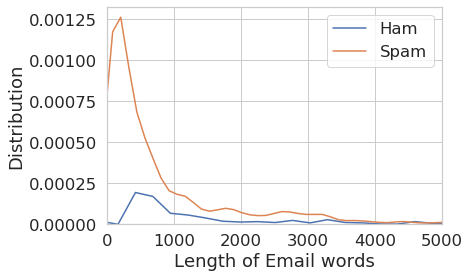

In [18]:
# Testing to see if number words, not characters (similar to character lengths)
temp = original_training_data.copy()
lengths = temp[['email']]
lengths['count'] = train['email'].str.count(' ') + 1
spam_ham = train['spam']
spam_ham = spam_ham.replace(0, 'ham')
spam_ham = spam_ham.replace(1, 'spam')
lengths['spam'] = spam_ham
lengths = lengths.drop(columns = {'email'})
hams_length = lengths[lengths['spam'] == 'ham'].drop(columns = {'spam'})
spam_length = lengths[lengths['spam'] == 'spam'].drop(columns = {'spam'})
plt.xlim(0, 5000)
ax = sns.distplot(hams_length, hist = False, label = 'Ham')
ax = sns.distplot(spam_length, hist = False, label = 'Spam')
ax.set_ylabel('Distribution')
ax.set_xlabel('Length of Email words')

Text(0.5, 0, 'Words')

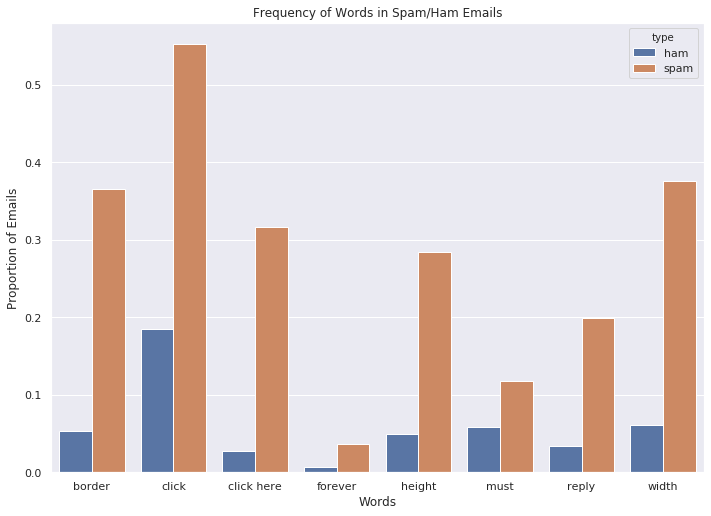

In [19]:
# Deciding on which words to use by plotting them
temp = original_training_data.copy()
train=temp.reset_index(drop=True) # We must do this in order to preserve the ordering of emails to labels for words_in_texts

words = ['reply', 'width', 'height', 'must', 'border', 'forever', 'click', 'click here']

words_array = words_in_texts(words, train['email'])
table = pd.DataFrame(words_array)
table.columns = words
spam_ham = train['spam']
spam_ham = spam_ham.replace(0, 'ham')
spam_ham = spam_ham.replace(1, 'spam')
table['type'] = spam_ham
melted = pd.melt(table, id_vars = ['type'], value_vars= words)
melted_group = melted.groupby(['variable', 'type']).mean().reset_index()
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x="variable", y="value", hue="type", data=melted_group)
ax.set_title('Frequency of Words in Spam/Ham Emails')
ax.set_ylabel('Proportion of Emails')
ax.set_xlabel('Words')

In [20]:
# Tests to see the ratio between the two proportions derived from the graph above 
def top_diff(table):
    spam = table[table['type'] == 'spam']
    ham = table[table['type'] == 'ham']
    division = (np.array(spam['value']) / np.array(ham['value']))
    return division


top_diff(melted_group)

array([ 6.93740318,  2.98165624, 11.70734312,  5.20849618,  5.73593883,
        2.02744875,  5.81548857,  6.1702418 ])

Text(0.5, 0, 'Words')

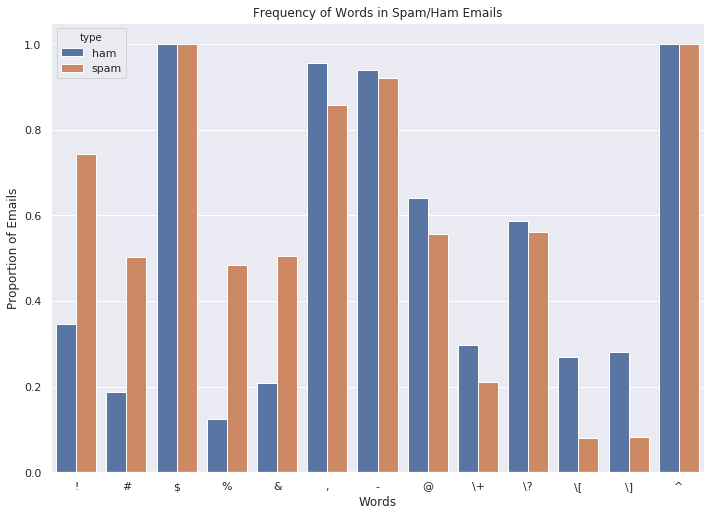

In [21]:
# Deciding on which words to use by plotting them

temp = original_training_data.copy()
train=temp.reset_index(drop=True) # We must do this in order to preserve the ordering of emails to labels for words_in_texts

words = ['!', '@', '#', '$', '%', '^', '&', ',', "\[", '\]', '\?', '-', '\+']

words_array = words_in_texts(words, train['email'])
table = pd.DataFrame(words_array)
table.columns = words
spam_ham = train['spam']
spam_ham = spam_ham.replace(0, 'ham')
spam_ham = spam_ham.replace(1, 'spam')
table['type'] = spam_ham
melted = pd.melt(table, id_vars = ['type'], value_vars= words)
melted_group = melted.groupby(['variable', 'type']).mean().reset_index()
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x="variable", y="value", hue="type", data=melted_group)
ax.set_title('Frequency of Words in Spam/Ham Emails')
ax.set_ylabel('Proportion of Emails')
ax.set_xlabel('Words')

In [22]:
# All of the unique characters are prevalent in the spams and hams, maybe the counts are different

In [23]:
# Seeing how many unique characters ['!', '@', '#',' $', '%','^', '&', '*','(', ')'] + other words are in spam vs ham
def email_counts(character):
    temp = original_training_data.copy()[['email', 'spam']]
    for char in character:
        temp[char + '_count'] = temp.email.str.count(char)
    spam_ham = temp['spam']
    spam_ham = spam_ham.replace(0, 'ham')
    spam_ham = spam_ham.replace(1, 'spam')
    temp['spam'] = spam_ham    
    return temp
email_counts(['!', '@', '#',' $', '%','^', '&', '\[','\]','\(', '\)', 'size', 'opportunity', 'guarantee', "border", "align", "font size", "base64", "center", "body", "table width", "head", 'body'])

,email,spam,!_count,@_count,#_count,$_count,%_count,^_count,&_count,\[_count,...,opportunity_count,guarantee_count,border_count,align_count,font size_count,base64_count,center_count,body_count,table width_count,head_count
0,url: http://boingboing.net/#85534171\n date: n...,ham,1,0,1,1,0,1,1,4,...,0,0,0,0,0,0,0,0,0,0
1,url: http://scriptingnews.userland.com/backiss...,ham,0,0,1,1,0,1,0,2,...,0,0,0,0,0,0,0,0,0,0
2,<html>\n <head>\n </head>\n <body>\n <font siz...,spam,0,0,0,1,0,1,0,0,...,0,1,0,0,1,0,0,2,0,2
3,depends on how much over spending vs. how much...,ham,0,2,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
4,hehe sorry but if you hit caps lock twice the ...,ham,1,7,0,1,0,1,0,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8343,"thanks for this, i'm going to give them anothe...",ham,1,2,60,1,1,1,0,3,...,0,0,0,0,0,0,0,0,0,0
8344,thanks for the link - i'm fascinated by archae...,ham,0,3,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
8345,we need help. we are a 14 year old fortune 50...,spam,5,0,0,1,1,1,0,0,...,4,1,0,0,0,0,0,0,0,0
8346,<html>\n \n \n <head> \n <meta charset=3dutf-8...,spam,9,0,12,1,1,1,0,0,...,2,0,2,5,7,0,9,5,0,2


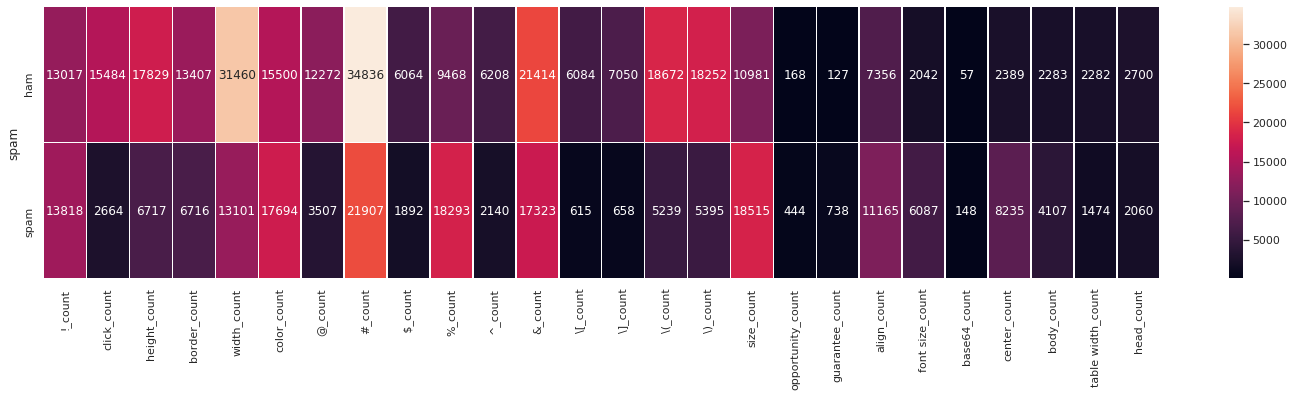

In [24]:
# Good words are @, $, [] 
heat = email_counts(['!','click','height', 'border', 'width', 'color', '@', '#',' $', '%','^', '&', '\[','\]','\(', '\)','size', 'opportunity', 'guarantee', "border", "align", "font size", "base64", "center", "body", "table width", "head", 'body']).drop(columns = {'email'})
heat = heat.groupby('spam').sum()

# Draw a heatmap with the numeric values in each cell
fig, ax = plt.subplots(figsize=(25,5)) 
sns.heatmap(heat, annot=True, fmt="d", linewidths=.5, ax= ax)


In [25]:
temp_transform = original_training_data.copy()
# Function To change Dataframe to correct Format for Modeling
def transform(table):
    return_df = table.copy()
    #Word Proportion
    word_prop = (['size', 'opportunity', 'guarantee', 'click here', 'wrote' 
                  "border", "align", "font size", "base64", 'border'
                  "center", "body", "table width", "head", 'body', 'font', 'mortgage'
                  'insurance', 'best', 'free', 'body', 'html', 'offer', 'please', 'debt',
                  'low', 'invest', '!', '#', '%', '&', 'height', 'reply', 'width', 'color'])
    for word in word_prop:
        return_df[word] = 1* return_df['email'].str.contains(word)
    #Word Count
    character = ['\[','\]', '@', '\(','\)','click','height']
    for char in character:
        return_df[char + '_count'] = return_df.email.str.count(char)
    #Email Length characters
    return_df['email_char_len'] = return_df['email'].str.len()
    #Email Length Words
    return_df['email_word_len'] = return_df['email'].str.count(' ') + 1
    #Email if char len is greater than 2000
    return_df['email_len>2000'] = return_df['email_char_len'] >= 1800
    #Email if word len is greater than 2000
    return_df['email__wordlen>2000'] = return_df['email_word_len'] >= 900


    
    return_df = return_df.drop(columns = {'id', 'subject', 'email', 'email_char_len'})
    return return_df

transform(temp_transform)

,spam,size,opportunity,guarantee,click here,wroteborder,align,font size,base64,bordercenter,...,\[_count,\]_count,@_count,\(_count,\)_count,click_count,height_count,email_word_len,email_len>2000,email__wordlen>2000
0,0,0,0,0,0,0,0,0,0,0,...,4,4,0,1,1,0,0,50,False,False
1,0,0,0,0,0,0,0,0,0,0,...,2,2,0,0,0,0,0,28,False,False
2,1,1,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,68,False,False
3,0,0,0,0,0,0,0,0,0,0,...,1,1,2,5,5,0,0,253,False,False
4,0,0,0,0,0,0,0,0,0,0,...,2,2,7,5,5,0,0,334,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8343,0,1,0,0,0,0,0,0,0,0,...,3,3,2,6,7,0,0,354,True,False
8344,0,0,0,0,0,0,0,0,0,0,...,0,0,3,1,1,0,0,1037,True,True
8345,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,139,False,False
8346,1,1,1,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,311,True,False


In [26]:
# Cross Validation
from sklearn.model_selection import cross_val_score
y_temp = original_training_data['spam']
x_temp = original_training_data.drop(columns = {'spam'})
x_temp = transform(x_temp)
first_model = LogisticRegression(max_iter = 10000)
print(np.mean(cross_val_score(first_model, x_temp, y_temp, cv=5)))

0.912074209878625


### Question 7: Feature/Model Selection Process

In the following cell, describe the process of improving your model. You should use at least 2-3 sentences each to address the follow questions:

1. How did you find better features for your model?
2. What did you try that worked / didn't work?
3. What was surprising in your search for good features?

<!--
BEGIN QUESTION
name: q7
manual: True
points: 6
-->
<!-- EXPORT TO PDF -->

1. To find better features for my model, I looked through some of the spam and ham email contents and subject lines to see if I could determine some features that could help me distinguish the two of them. Once I found some potential features, I created visualizations such as barcharts and histograms to visualize the differences between spam and ham in regards of the feature (Like finding the count of !, [, ], in both spam and ham). This allowed me to locate better features
2. A lot of the words I tested (for both the count of the word and whether or not the word was present in the email) did not improve my model. As a result, I realized that I couldn't randomly plug in words into my models to use as features, I needed to visualize these words with a barchart and compare their presence/count between spam and ham emails. This helped me figure out which words worked and didn't work. Additionally, I found that determining whether or not the email length was > or less than a certain value worked very well to improve my model.
3. I was surprised to see the effects of special characters (such as puntucation and brakets) had on improving my model. A lot of these special characters were seen in many spam emails but weren't seen or as prevalent in ham emails.


### Question 8: EDA

In the cell below, show a visualization that you used to select features for your model. Include

1. A plot showing something meaningful about the data that helped you during feature selection, model selection, or both.
2. Two or three sentences describing what you plotted and its implications with respect to your features.

Feel to create as many plots as you want in your process of feature selection, but select one for the response cell below.

**You should not just produce an identical visualization to question 3.** Specifically, don't show us a bar chart of proportions, or a one-dimensional class-conditional density plot. Any other plot is acceptable, as long as it comes with thoughtful commentary. Here are some ideas:

1. Consider the correlation between multiple features (look up correlation plots and `sns.heatmap`). 
1. Try to show redundancy in a group of features (e.g. `body` and `html` might co-occur relatively frequently, or you might be able to design a feature that captures all html tags and compare it to these). 
1. Visualize which words have high or low values for some useful statistic.
1. Visually depict whether spam emails tend to be wordier (in some sense) than ham emails.

Generate your visualization in the cell below and provide your description in a comment.

<!--
BEGIN QUESTION
name: q8
manual: True
format: image
points: 6
-->
<!-- EXPORT TO PDF format:image -->

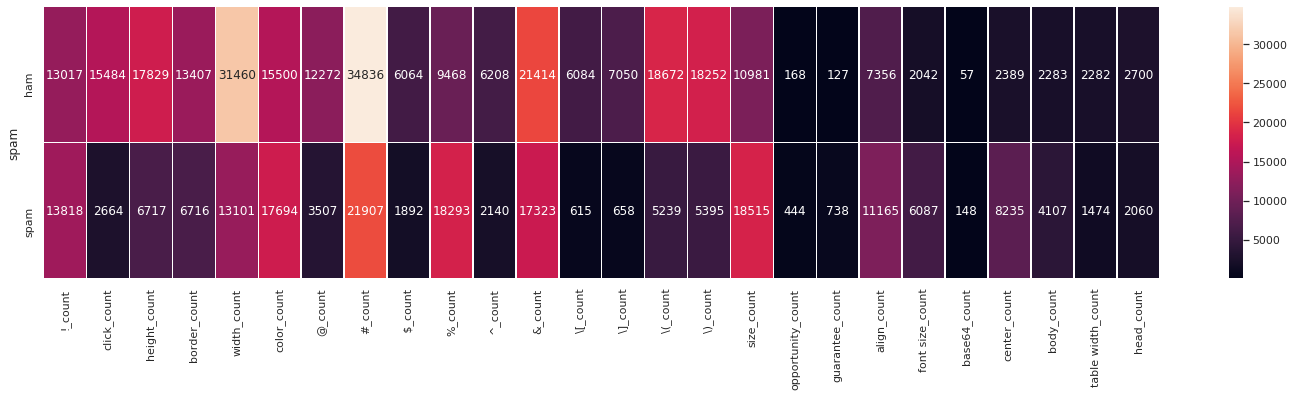

In [27]:
# Write your description (2-3 sentences) as a comment here:
# Instead of just seeing whether or not a word existed in an email, I wanted to figure out whether to how many times the word appeared in an email on average could be a potential feature
# Below is a heatmap that shows how many times the respective character or word was seen in the emails for both ham and spam. This allowed me to 
# visualize and see which words were more prevalent in spam vs ham. For example, we can see that words such as click and @ were very common so they could be good features to use.

# Write the code to generate your visualization here:
def email_counts(character):
    temp = original_training_data.copy()[['email', 'spam']]
    for char in character:
        temp[char + '_count'] = temp.email.str.count(char)
    spam_ham = temp['spam']
    spam_ham = spam_ham.replace(0, 'ham')
    spam_ham = spam_ham.replace(1, 'spam')
    temp['spam'] = spam_ham    
    return temp
# Good words are @, $, [] 
heat = email_counts(['!','click','height', 'border', 'width', 'color', '@', '#',' $', '%','^', '&', '\[','\]','\(', '\)','size', 'opportunity', 'guarantee', "border", "align", "font size", "base64", "center", "body", "table width", "head", 'body']).drop(columns = {'email'})
heat = heat.groupby('spam').sum()

# Draw a heatmap with the numeric values in each cell
fig, ax = plt.subplots(figsize=(25,5)) 
sns.heatmap(heat, annot=True, fmt="d", linewidths=.5, ax= ax)
# Note: if your plot doesn't appear in the PDF, you should try uncommenting the following line:
# plt.show()

# Question 9: Submitting to Kaggle

The following code will write your predictions on the test dataset to a CSV, which you can submit to Kaggle. You may need to modify it to suit your needs.

Save your predictions in a 1-dimensional array called `test_predictions`. *Even if you are not submitting to Kaggle, please make sure you've saved your predictions to `test_predictions` as this is how your score for this question will be determined.*

Remember that if you've performed transformations or featurization on the training data, you must also perform the same transformations on the test data in order to make predictions. For example, if you've created features for the words "drug" and "money" on the training data, you must also extract the same features in order to use scikit-learn's `.predict(...)` method.

You should submit your CSV files to https://www.kaggle.com/t/c76d80f7d3204159865a324ec2936f18

**Note: You may submit up to 4 times a day. If you have submitted 4 times on a day, you will need to wait until the next day for more submissions.**

Note that this question is graded on an absolute scale based on the accuracy your model achieves on the test set and the score does not depend on your ranking on Kaggle. 

*The provided tests check that your predictions are in the correct format, but you must submit to Kaggle to evaluate your classifier accuracy.*

<!--
BEGIN QUESTION
name: q9
points: 15
-->

In [28]:
first_model.fit(x_temp, y_temp)
test_transformed = transform(test)
test_predictions = first_model.predict(test_transformed)
test_predictions

array([0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,

In [29]:
ok.grade("q9");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 3
    Failed: 0
[ooooooooook] 100.0% passed



The following saves a file to submit to Kaggle.

In [30]:
from datetime import datetime

# Assuming that your predictions on the test set are stored in a 1-dimensional array called
# test_predictions. Feel free to modify this cell as long you create a CSV in the right format.

# Construct and save the submission:
submission_df = pd.DataFrame({
    "Id": test['id'], 
    "Class": test_predictions,
}, columns=['Id', 'Class'])
timestamp = datetime.isoformat(datetime.now()).split(".")[0]
submission_df.to_csv("submission_{}.csv".format(timestamp), index=False)

print('Created a CSV file: {}.'.format("submission_{}.csv".format(timestamp)))
print('You may now upload this CSV file to Kaggle for scoring.')

Created a CSV file: submission_2020-04-27T18:21:26.csv.
You may now upload this CSV file to Kaggle for scoring.


# Submit
Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output.
**Please save before submitting!**

<!-- EXPECT 5 EXPORTED QUESTIONS -->

In [33]:
# Save your notebook first, then run this cell to submit.
import jassign.to_pdf
jassign.to_pdf.generate_pdf('proj2b.ipynb', 'proj2b.pdf')
ok.submit()

Generating PDF...
Saved proj2b.pdf


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'proj2b.ipynb'.
Submit... 100% complete
Submission successful for user: jqypang915@berkeley.edu
URL: https://okpy.org/cal/data100/sp20/proj2b/submissions/E0P6Ek

